<a href="https://colab.research.google.com/github/Maria-Costa/Arduino-Fisica/blob/main/Arduino_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # para ler o excel e mexer com tabelas
import numpy as np   # para fazer cálculos como média, ajuste linear e tudo mais
import matplotlib.pyplot as plt  # para gerar gráficos

In [ ]:
# import da planilha do excel que foi utilizada durante as aulas para trabalhar com os dados do Tracker e gerar os gráficos
from google.colab import files
uploaded = files.upload()

Saving ARDUINO1.xlsx to ARDUINO1.xlsx


In [ ]:
# ler a planilha correta, ignorando as 2 primeiras linhas
df_q = pd.read_excel("ARDUINO1.xlsx", sheet_name="QUADRADO", skiprows=2)
df_x = pd.read_excel("ARDUINO1.xlsx", sheet_name="XIS", skiprows=2)

# seleciona apenas as colunas úteis
df_q = df_q[['t(s)', 'x(m)', 'v(x)']]
df_x = df_x[['t(s)', 'x(m)', 'v(x)']]

# para renomear as colunas para os nomes que eu quero
df_q.columns = ['tempo', 'posicao', 'velocidade']
df_x.columns = ['tempo', 'posicao', 'velocidade']

# garante os valores numéricos e remove linhas em branco
df_quad = df_q.apply(pd.to_numeric, errors='coerce').dropna(subset=['tempo', 'posicao'])
df_xis = df_x.apply(pd.to_numeric, errors='coerce').dropna(subset=['tempo', 'posicao'])


#Gráficos do Modo ⊗

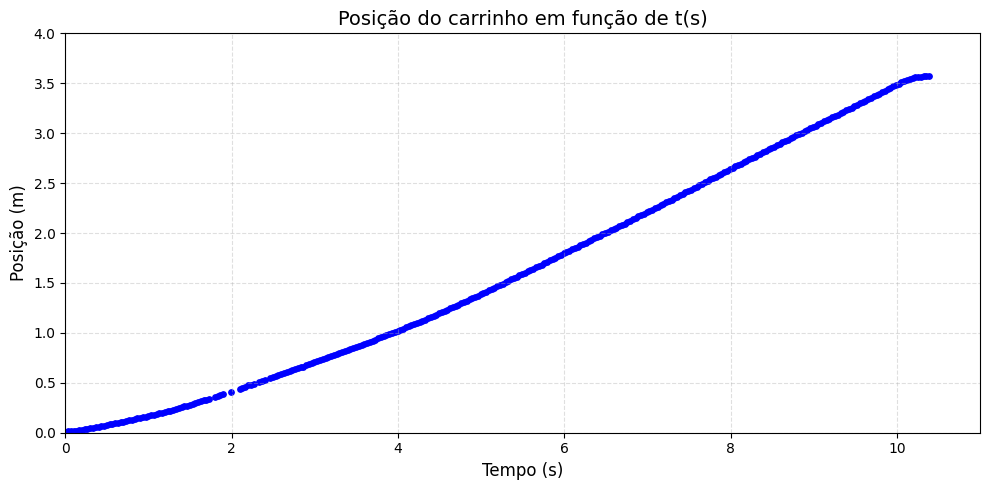

Máximo de tempo: 10.39s
Máxima posição: 3.57m


In [ ]:
# gráfico Posição x Tempo
plt.figure(figsize=(10, 5))
plt.scatter(df_x['tempo'], df_x['posicao'], color='blue', s=15)

plt.title('Posição do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Posição (m)', fontsize=12)
plt.xlim(0, 11)
plt.ylim(0, 4)
plt.grid(True, linestyle='--', alpha=0.4)

# para exportar pro relatório
plt.savefig("grafico_xt_modo_x.png", dpi=300)

plt.tight_layout()
plt.show()

# informação complementar sobre os dados
print(f"Máximo de tempo: {df_x['tempo'].max():.2f}s")
print(f"Máxima posição: {df_x['posicao'].max():.2f}m")

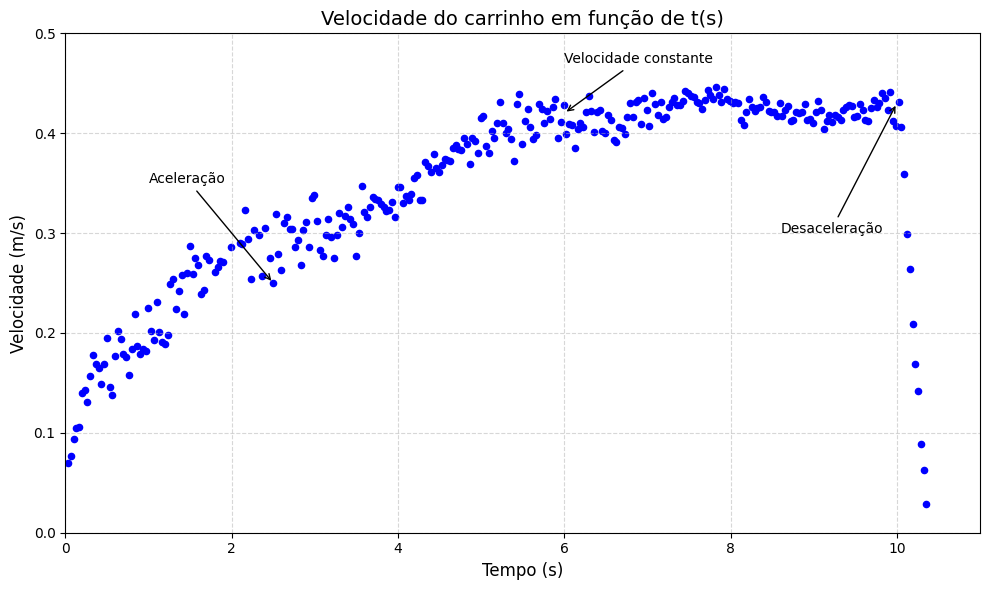

Máximo de tempo: 10.38853s
Máxima posição: 3.571483m


In [127]:
# Velocidade x Tempo – Modo X
plt.figure(figsize=(10, 6))
plt.scatter(df_x['tempo'], df_x['velocidade'], color='blue', s=20)

plt.title('Velocidade do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade (m/s)', fontsize=12)
plt.xlim(0, 11)
plt.ylim(0, 0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# aceleração inicial
plt.annotate('Aceleração',
             xy=(2.5, 0.25),
             xytext=(1, 0.35),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# velocidade constante
plt.annotate('Velocidade constante',
             xy=(6, 0.42),
             xytext=(6, 0.47),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# desaceleraçaõ
plt.annotate('Desaceleração',
             xy=(10, 0.43),
             xytext=(8.6, 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# para exportar pro relatório
plt.savefig("grafico_vt_modo_x.png", dpi=300)

plt.tight_layout()
plt.show()

print(f"Máximo de tempo: {df_x['tempo'].max()}s")
print(f"Máxima posição: {df_x['posicao'].max()}m")

#Gráficos do Modo ⊡

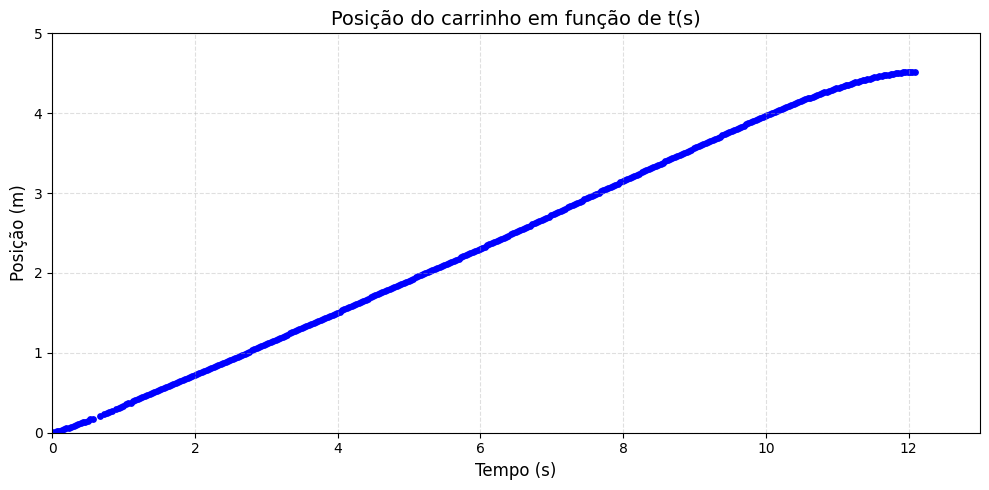

Máximo de tempo no modo quadrado: 12.08657
Máxima posição: 4.520673


In [ ]:
# gráfico Posição x Tempo
plt.figure(figsize=(10, 5))
plt.scatter(df_q['tempo'], df_q['posicao'], color='blue', label='x(t)', s=15)

plt.title('Posição do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Posição (m)', fontsize=12)
plt.xlim(0, 13)
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# para exportar pro relatório
plt.savefig("grafico_xt_modo_q.png", dpi=300)

plt.tight_layout()
plt.show()

print(f"Máximo de tempo no modo quadrado: {df_q['tempo'].max()}")
print(f"Máxima posição: {df_q['posicao'].max()}")

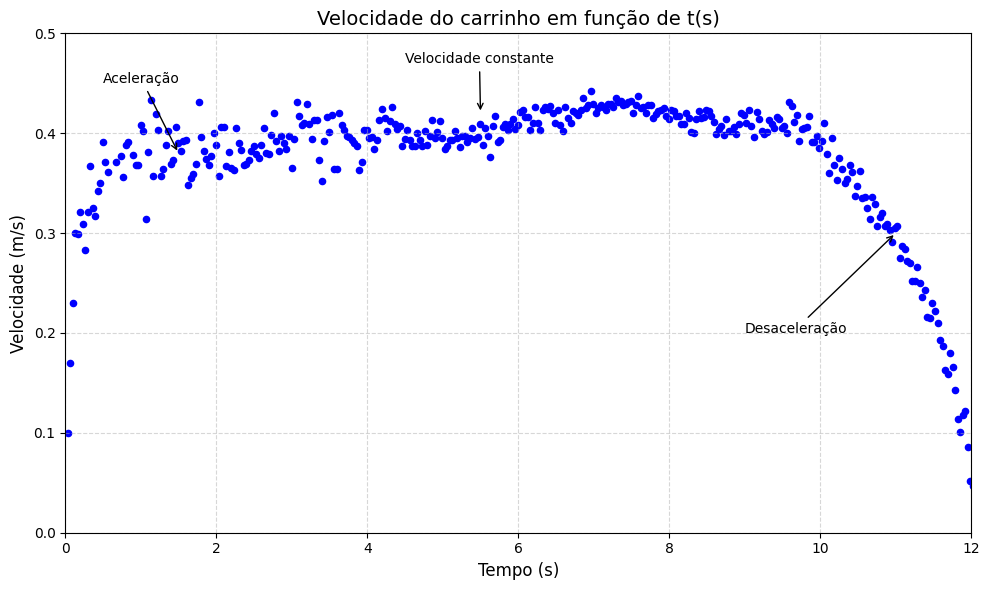

Máximo de tempo no modo quadrado: 12.08657
Máxima posição: 4.520673


In [ ]:
# Velocidade x Tempo
plt.figure(figsize=(10, 6))
plt.scatter(df_q['tempo'], df_q['velocidade'], color='blue', s=20)

plt.title('Velocidade do carrinho em função de t(s)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade (m/s)', fontsize=12)
plt.xlim(0, 12)
plt.ylim(0, 0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Aceleração inicial
plt.annotate('Aceleração',
             xy=(1.5, 0.38),
             xytext=(0.5, 0.45),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Velocidade constante
plt.annotate('Velocidade constante',
             xy=(5.5, 0.42),
             xytext=(4.5, 0.47),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Desaceleração
plt.annotate('Desaceleração',
             xy=(11, 0.3),
             xytext=(9, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# para exportar pro relatório
plt.savefig("grafico_vt_modo_q.png", dpi=300)

plt.tight_layout()
plt.show()

print(f"Máximo de tempo no modo quadrado: {df_q['tempo'].max()}")
print(f"Máxima posição: {df_q['posicao'].max()}")